In [7]:
import numpy as np
import cv2

In [8]:
import glob, os
folder = 'croped_images_training/*'
image_files_list =  sorted(glob.glob(folder), key=os.path.getmtime)


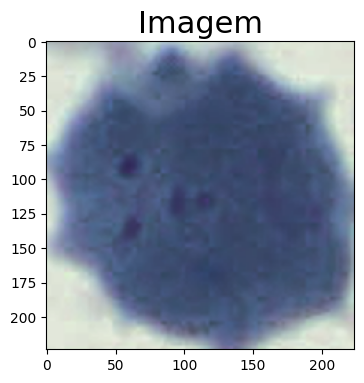

In [18]:
img_filename = image_files_list[221]
img = cv2.imread(img_filename) 
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
showSingleImage(rgb, "Imagem", (4, 4))

img_filename = image_files_list
img = cv2.imread(img_filename) 
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
showSingleImage(rgb, "Imagem", (4, 4))

In [13]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)
    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()


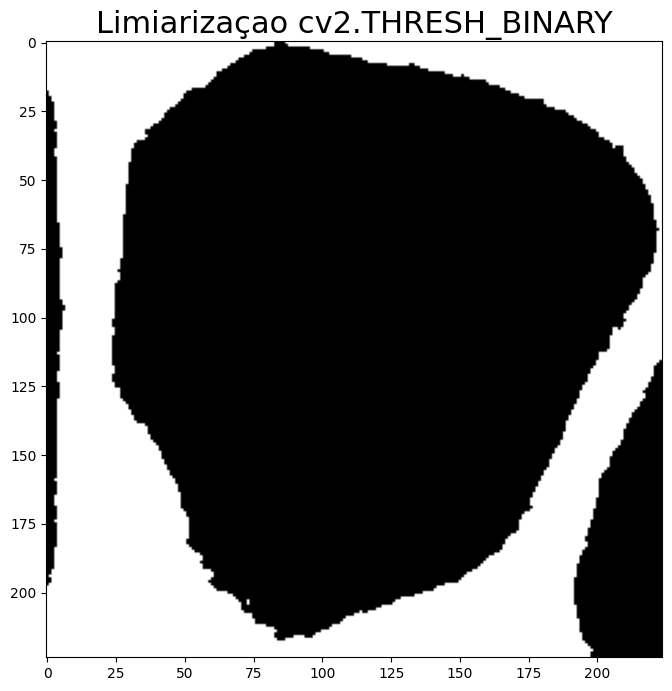

In [14]:
# Limiarização simples
limiar = 145 # 0 - 255
thresh, img_thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_OTSU)
showSingleImage(img_thresh, "Limiarizaçao cv2.THRESH_BINARY", (8, 8))

In [15]:
#Limiarização adaptativa
img = cv2.imread(img_filename, 0)
imgNormTrash = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
imgAdapMean = cv2.adaptiveThreshold(RGB, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 255, 23
            )



showSingleImage(imgAdapMean, "AdaptativeTrash", (8,8))

NameError: name 'RGB' is not defined

In [19]:
def remove_mean_rgb(img):
  

    # Divida a imagem nos canais de cores (B, G, R)
    b, g, r = cv2.split(img)

    # Calcule o valor médio para cada canal
    mean_b = np.mean(b)
    mean_g = np.mean(g)
    mean_r = np.mean(r)

    # Subtraia o valor médio de cada canal de seus respectivos pixels
    b = np.clip(b - mean_b, 0, 255).astype(np.uint8)
    g = np.clip(g - mean_g, 0, 255).astype(np.uint8)
    r = np.clip(r - mean_r, 0, 255).astype(np.uint8)

    # Combine os canais novamente
    result_img = cv2.merge((b, g, r))

    # Exiba a imagem resultante
    showSingleImage(img, "original", (8,8))
    showSingleImage(result_img, "rmd", (8,8))

    # Aguarde uma tecla e feche as janelas
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

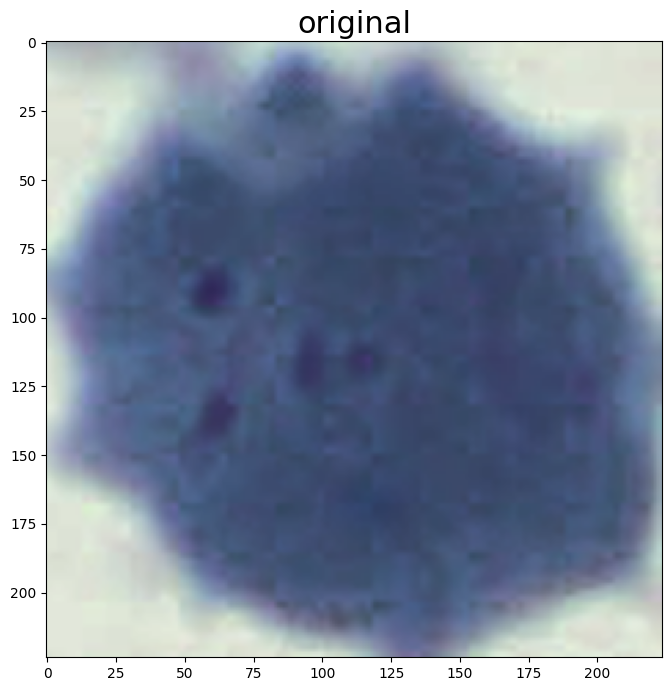

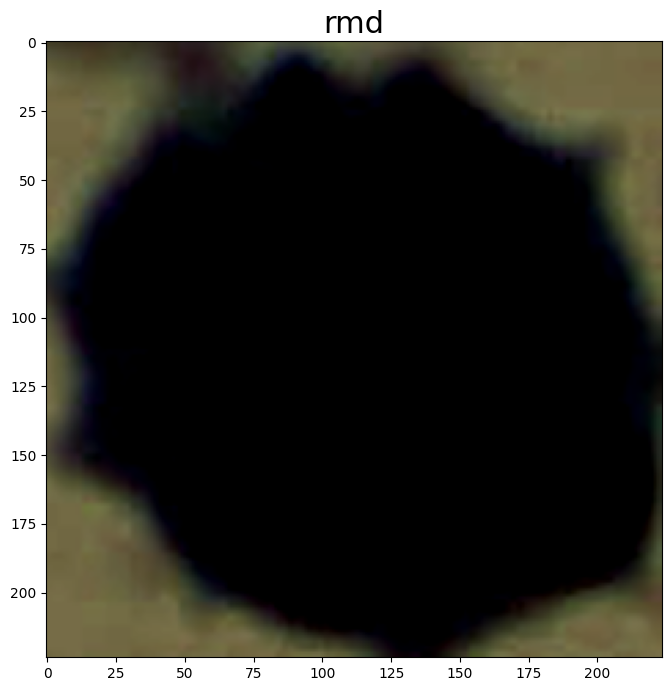

In [20]:
remove_mean_rgb(rgb)